In [7]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import torchvision.transforms.functional as fn
import torchvision.transforms as transforms


In [8]:
CONFIG = {
    "dataset": {
        "img_dir": "data/images",
        "annotations_file": "data/labels.csv",
    },
    "dataloader": {
        "batch_size": 2,
    }
}

In [9]:
class MTGCardsDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = np.array(self.img_labels.iloc[idx, [1,2,3,4]].values, dtype=float)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [10]:
test_dataset = MTGCardsDataset(annotations_file=CONFIG["dataset"]["annotations_file"], img_dir=CONFIG["dataset"]["img_dir"], transform=transforms.Resize([224,224]))
test_dataloader = DataLoader(test_dataset, batch_size=CONFIG["dataloader"]["batch_size"])

      imagename  x  y  w  h
0  image_01.jpg  2  3  4  5
1  image_02.jpg  6  7  8  9


0
1


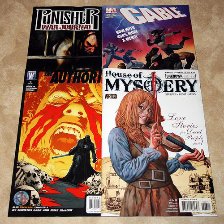

In [11]:
images, labels = next(iter(test_dataloader))
fn.to_pil_image(images[0])

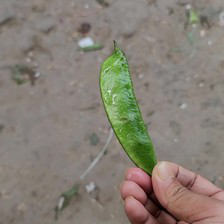

In [12]:
fn.to_pil_image(images[1])